This notebook uses the packages __pandas__(loads datasets and output tables), __scikit-learn__(contains decision tree classifiers) and __matplotlib__(contains module for plotting graphs). The folders containing each dataset must be in the same directory as this notebook. 

The sizes for the graph and its fonts were found in 
https://www.kdnuggets.com/2019/04/data-visualization-python-matplotlib-seaborn.html

In [1]:
# style and size for graph fonts
fontdict_title = {'fontsize': 24,'weight': 'bold','horizontalalignment': 'center'}
fontdict_xlabel = {'fontsize': 18, 'weight': 'bold','horizontalalignment': 'center'}
fontdict_ylabel = {'fontsize': 16, 'weight': 'bold','horizontalalignment': 'center', 'verticalalignment': 'baseline'}

In order to run the code for this project, the following packages must be imported

In [2]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd # load datasets
import matplotlib.pyplot as plt

The following line is used to show the plots inside the notebook

In [3]:
%matplotlib inline

# Problem 1: Madelon

Load training and test sets from the __madelon__ dataset

In [4]:
madelon_train_data = pd.read_csv("./MADELON/madelon_train.data", header=None, sep=" ").dropna(axis=1)
madelon_train_labels = pd.read_csv("./MADELON/madelon_train.labels", header=None, sep=" ").dropna(axis=1)
madelon_test_data = pd.read_csv("./MADELON/madelon_valid.data", header=None, sep=" ").dropna(axis=1)
madelon_test_labels = pd.read_csv("./MADELON/madelon_valid.labels", header=None, sep=" ").dropna(axis=1)

Create 12 decision trees with depths 1 to 12

In [5]:
madelon_max_tree_depths = list(range(1, 13))
madelon_dec_trees = [DecisionTreeClassifier(max_depth=tree_depth, random_state=0) for tree_depth in madelon_max_tree_depths]

Train and test 12 decision trees with depths 1 through 12 and store the misclassification errors for training and test sets.

In [6]:
madelon_misclassification_errors = {
    "train": [],
    "test": []
}
for madelon_dec_tree in madelon_dec_trees:
    madelon_dec_tree = madelon_dec_tree.fit(madelon_train_data.values, madelon_train_labels.values)
    madelon_misclassification_errors["train"].append([1 - madelon_dec_tree.score(madelon_train_data.values,
                                                                                 madelon_train_labels.values),
                                                      madelon_dec_tree.max_depth])
    madelon_misclassification_errors["test"].append([1 - madelon_dec_tree.score(madelon_test_data.values,
                                                                                madelon_test_labels.values),
                                                     madelon_dec_tree.max_depth])

Plot training and test errors vs tree depths graph

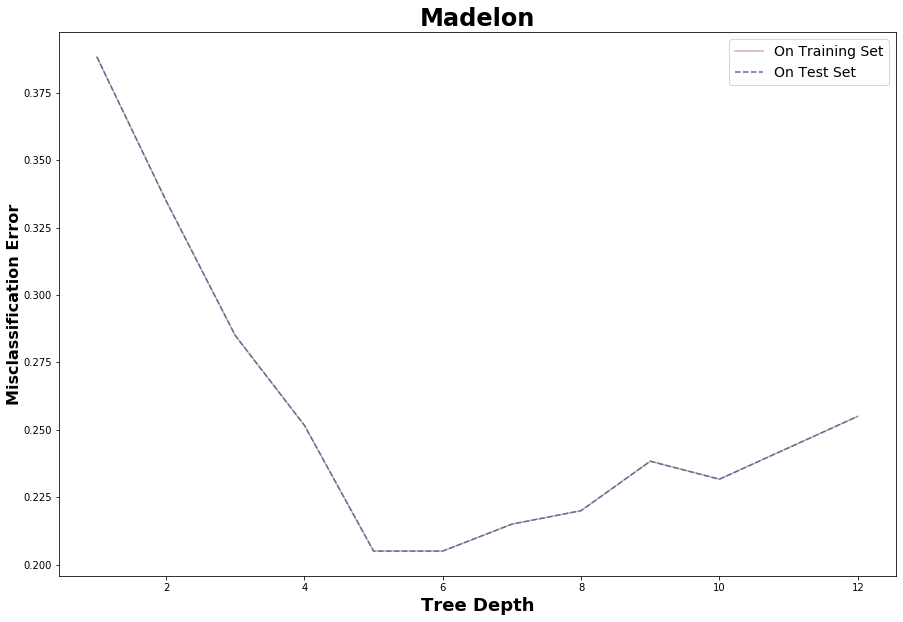

In [7]:
# size of graph
plt.rcParams['figure.figsize'] = [15, 10] # size=15x10 inches

# labels
plt.title("Madelon", fontdict=fontdict_title)
plt.xlabel("Tree Depth", fontdict=fontdict_xlabel)
plt.ylabel("Misclassification Error", fontdict=fontdict_ylabel)

# plotting
madelon_train_misclassification_errors = [train_error[0] for train_error in madelon_misclassification_errors["train"]]
madelon_train_misclassification_errors = [test_error[0] for test_error in madelon_misclassification_errors["test"]]
plt.plot(madelon_max_tree_depths, madelon_train_misclassification_errors,
         color="#CDB1AD",
         linestyle="-",
         label="On Training Set")
plt.plot(madelon_max_tree_depths, madelon_train_misclassification_errors,
         color="#5D6E9E",
         linestyle="--",
         label="On Test Set")
plt.legend(fontsize=14);

# Problem 2: Wilt

Load training and test sets from the __wilt__ dataset

In [8]:
wilt_train_data = pd.read_csv("./wilt/wilt_train.csv", header=None)
wilt_train_labels = pd.read_csv("./wilt/wilt_train.labels", header=None)
wilt_test_data = pd.read_csv("./wilt/wilt_test.csv", header=None)
wilt_test_labels = pd.read_csv("./wilt/wilt_test.labels", header=None)

Create 10 decision trees with depths 1 to 10

In [9]:
wilt_max_tree_depths = list(range(1, 11))
wilt_dec_trees = [DecisionTreeClassifier(max_depth=depth, random_state=0) for depth in wilt_max_tree_depths]

Train and test 10 decision trees with depths 1 through 10 and store the misclassification errors for training and test sets.

In [10]:
wilt_misclassification_errors = {
    "train": [],
    "test": []
}
for wilt_dec_tree in wilt_dec_trees:
    wilt_dec_tree = wilt_dec_tree.fit(wilt_train_data.values, wilt_train_labels.values)
    wilt_misclassification_errors["train"].append([1 - wilt_dec_tree.score(wilt_train_data.values,
                                                                           wilt_train_labels.values),
                                                   wilt_dec_tree.max_depth])
    wilt_misclassification_errors["test"].append([1 - wilt_dec_tree.score(wilt_test_data.values,
                                                                          wilt_test_labels.values),
                                                  wilt_dec_tree.max_depth])

Plot training and test errors vs tree depths graph

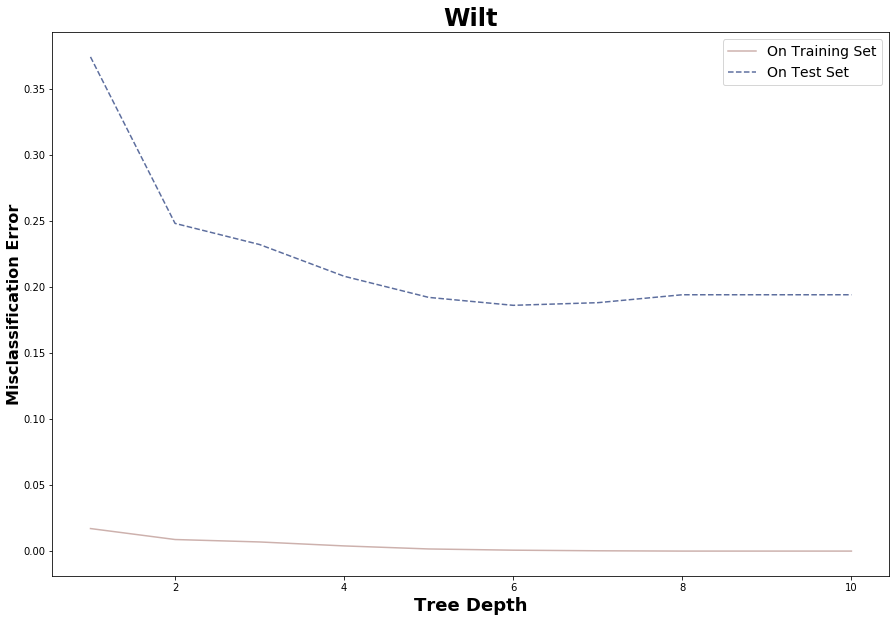

In [11]:
# size of graph
plt.rcParams['figure.figsize'] = [15, 10] # size=15x10 inches

# labels
plt.title("Wilt", fontdict=fontdict_title)
plt.xlabel("Tree Depth", fontdict=fontdict_xlabel)
plt.ylabel("Misclassification Error", fontdict=fontdict_ylabel)

# plotting
wilt_train_misclassification_errors = [train_error[0] for train_error in wilt_misclassification_errors["train"]]
wilt_test_misclassification_errors = [test_error[0] for test_error in wilt_misclassification_errors["test"]]
plt.plot(wilt_max_tree_depths, wilt_train_misclassification_errors,
         color="#CDB1AD",
         linestyle="-",
         label="On Training Set")
plt.plot(wilt_max_tree_depths, wilt_test_misclassification_errors,
         color="#5D6E9E",
         linestyle="--",
         label="On Test Set")
plt.legend(fontsize=14);

# Problem 3: Gisette

Load training and test sets from the __gisette__ dataset

In [12]:
gisette_train_data = pd.read_csv("./Gisette/gisette_train.data", header=None, sep=" ").dropna(axis=1)
gisette_train_labels = pd.read_csv("./Gisette/gisette_train.labels", header=None, sep=" ").dropna(axis=1)
gisette_test_data = pd.read_csv("./Gisette/gisette_valid.data", header=None, sep=" ").dropna(axis=1)
gisette_test_labels = pd.read_csv("./Gisette/gisette_valid.labels", header=None, sep=" ").dropna(axis=1)

Create 10 decision trees with depths 1 to 10

In [13]:
gisette_max_tree_depths = list(range(1, 11))
gisette_dec_trees = [DecisionTreeClassifier(max_depth=depth, random_state=0) for depth in gisette_max_tree_depths]

Train and test 10 decision trees with depths 1 through 10 and store the misclassification errors for training and test sets.

In [14]:
gisette_misclassification_errors = {
    "train": [],
    "test": []
}
for gisette_dec_tree in gisette_dec_trees:
    gisette_dec_tree = gisette_dec_tree.fit(gisette_train_data.values, gisette_train_labels.values)
    gisette_misclassification_errors["train"].append([1 - gisette_dec_tree.score(gisette_train_data.values,
                                                                                 gisette_train_labels.values),
                                                      gisette_dec_tree.max_depth])
    gisette_misclassification_errors["test"].append([1 - gisette_dec_tree.score(gisette_test_data.values,
                                                                                gisette_test_labels.values),
                                                     gisette_dec_tree.max_depth])

Plot training and test errors vs tree depths graph

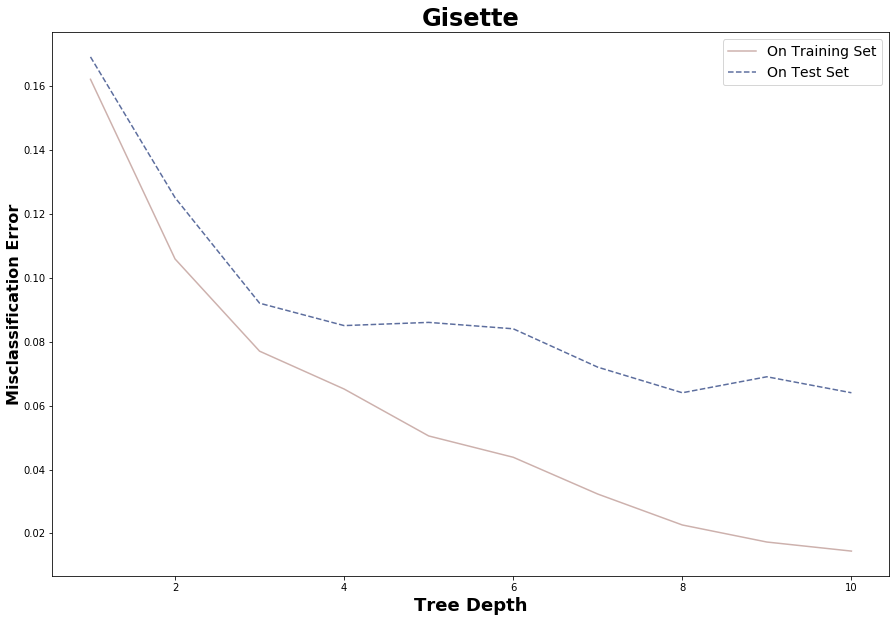

In [15]:
# size of graph
plt.rcParams['figure.figsize'] = [15, 10] # size=15x10 inches

# labels
plt.title("Gisette", fontdict=fontdict_title)
plt.xlabel("Tree Depth", fontdict=fontdict_xlabel)
plt.ylabel("Misclassification Error", fontdict=fontdict_ylabel)

# plotting
gisette_train_misclassification_errors = [train_error[0] for train_error in gisette_misclassification_errors["train"]]
gisette_test_misclassification_errors = [test_error[0] for test_error in gisette_misclassification_errors["test"]]
plt.plot(gisette_max_tree_depths, gisette_train_misclassification_errors,
         color="#CDB1AD",
         linestyle="-",
         label="On Training Set")
plt.plot(gisette_max_tree_depths, gisette_test_misclassification_errors,
         color="#5D6E9E",
         linestyle="--",
         label="On Test Set")
plt.legend(fontsize=14);

# Minimum Misclassification Test Error Table

Create table with the minimum misclassification test error of the __madelon__, __wilt__ and __gisette__ datasets with the corresponding max depth of the decision tree that produced the error

In [16]:
# Create labels
rows_labels = ["Madelon", "Wilt", "Gisette"]
columns_labels = ["Minimum Test Error","Tree Depth"]

# Find the minimum misclassification error from each dataset for training and testing
misclassification_errors = [madelon_misclassification_errors, wilt_misclassification_errors,
                            gisette_misclassification_errors]

min_test_errors = [min(errors["test"], key=lambda x: x[0]) for errors in misclassification_errors]

# Create dataframe to output table
tabledf=pd.DataFrame(min_test_errors, index=rows_labels, columns=columns_labels)
tabledf

,Minimum Test Error,Tree Depth
Madelon,0.205,5
Wilt,0.186,6
Gisette,0.064,8
